In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("16-diabetes.csv")

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.shape

(768, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

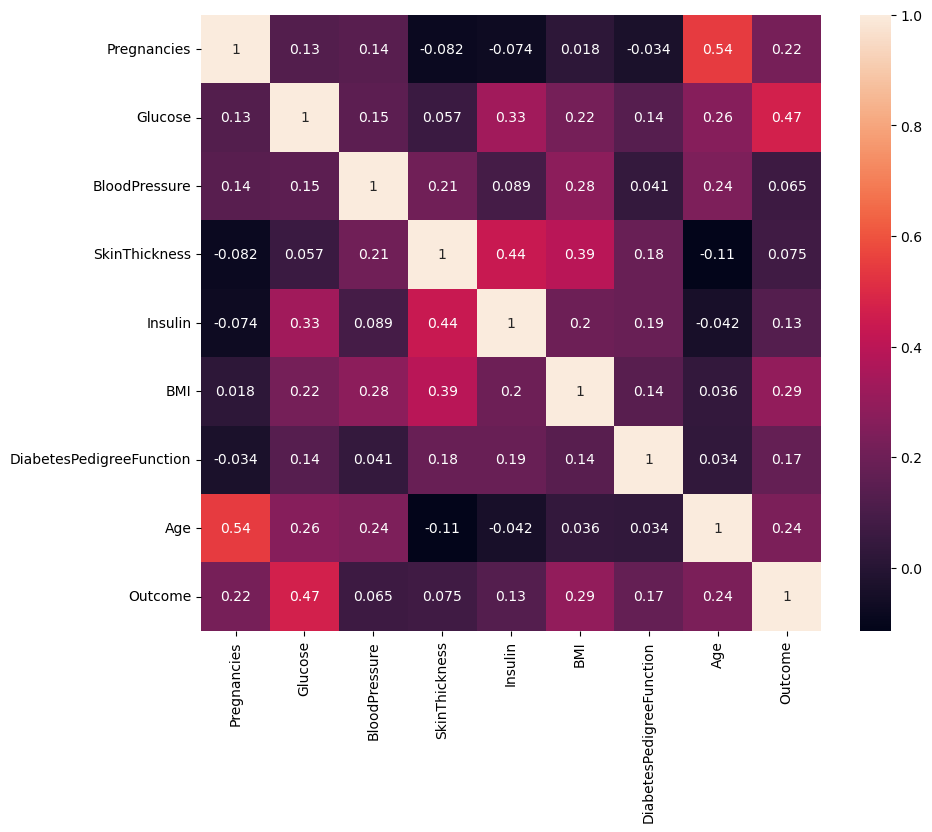

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

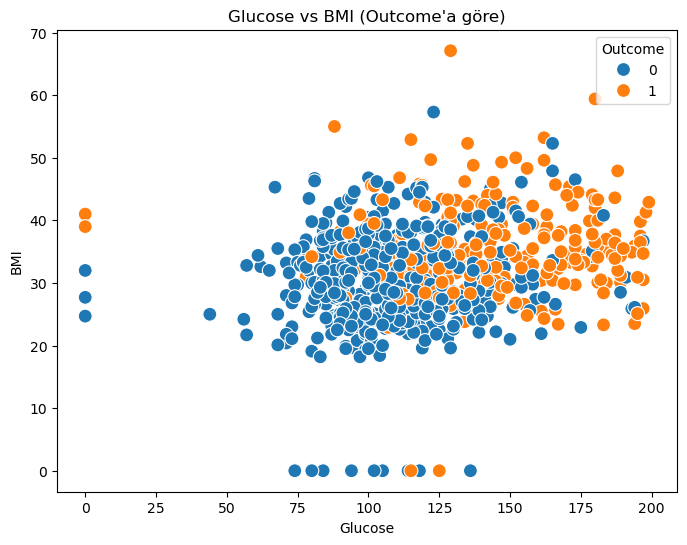

In [17]:
# 2️⃣ Glucose ve BMI dağılımı Outcome'a göre
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Glucose", y="BMI", hue="Outcome", s=100)
plt.title("Glucose vs BMI (Outcome'a göre)")
plt.show()


In [21]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [23]:
df["Insulin"].value_counts()

Insulin
0      374
105     11
130      9
140      9
120      8
      ... 
178      1
127      1
510      1
16       1
112      1
Name: count, Length: 186, dtype: int64

In [25]:
columns_to_check = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]

for col in columns_to_check:
    zero_count = (df[col]==0).sum()
    print(zero_count)

5
35
227
374
11


In [27]:
X = df.drop("Outcome",axis=1)
y = df["Outcome"]

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [115]:
columns_to_fill = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]

In [117]:
medians = {}
for col in columns_to_fill:
    medians_value = X_train[X_train[col] != 0][col].median()   # 0 olmayan verilerin her bir sutuna göre medyanını aldık
    medians[col] = medians_value
    X_train[col] = X_train[col].replace(0,medians_value)

for col in columns_to_fill:
    X_test[col] = X_test[col].replace(0,medians[col])

In [119]:
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.874593,121.664495,72.627036,29.219870,142.469055,32.628827,0.466471,33.594463
std,3.443637,30.264653,12.012608,8.844065,88.574564,6.994339,0.333203,12.016168
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,25.000000,120.500000,27.600000,0.238000,24.000000
50%,3.000000,118.000000,72.000000,29.000000,126.000000,32.400000,0.369000,29.000000
75%,6.000000,141.000000,80.000000,32.750000,130.000000,36.775000,0.606500,41.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [121]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [123]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [125]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred = ada.predict(X_test)

In [127]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       107
           1       0.69      0.62      0.65        47

    accuracy                           0.80       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.79      0.80      0.80       154

0.7987012987012987
[[94 13]
 [18 29]]


In [129]:
#hyperparameter tuning

In [131]:
ada_boost_params = {
    "n_estimators" : [50, 70, 100, 120, 150, 200],
    "learning_rate" : [0.001, 0.01, 0.1, 1, 10]
}

In [133]:
from sklearn.model_selection import GridSearchCV

In [135]:
grid = GridSearchCV(estimator=AdaBoostClassifier(),param_grid=ada_boost_params,scoring="accuracy",n_jobs=-1,cv=3)
grid.fit(X_train,y_train)


GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 100, 120, 150, 200]},
             scoring='accuracy')

In [136]:
grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 200}

In [137]:
ada = AdaBoostClassifier(learning_rate=1, n_estimators=150)
ada.fit(X_train,y_train)
y_pred = ada.predict(X_test)

In [138]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       107
           1       0.70      0.66      0.68        47

    accuracy                           0.81       154
   macro avg       0.78      0.77      0.77       154
weighted avg       0.81      0.81      0.81       154

0.8116883116883117
[[94 13]
 [16 31]]


In [203]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [215]:
# Modelleri tanımla
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

In [217]:
results = {}
for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.2f}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))


Logistic Regression Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.74      0.60      0.66        47

    accuracy                           0.81       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.81      0.81      0.81       154

[[97 10]
 [19 28]]
Decision Tree Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       107
           1       0.55      0.57      0.56        47

    accuracy                           0.73       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.73      0.73      0.73       154

[[85 22]
 [20 27]]
Random Forest Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       107
           1       0.71      0.64      0.67        47

    accuracy                           0.81       1

In [225]:
param_grids = {
    "Logistic Regression": {"C": [0.01, 0.1, 1, 10]},
    "Decision Tree": {"max_depth": [None, 3, 5, 7], "min_samples_split": [2, 5, 10]},
    "Random Forest": {"n_estimators": [50, 100, 200], "max_depth": [None, 3, 5]},
    "SVM": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]},
    "KNN": {"n_neighbors": [3,5,7,9], "weights": ["uniform", "distance"]}
}

In [233]:
results = {}
for name,model in models.items():
    print(f"Running GridSearch for: {name}")
    grid = GridSearchCV(estimator=model,param_grid=param_grids[name],cv=3,scoring="accuracy",n_jobs=-1)
    grid.fit(X_train,y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
        
    results[name] = {"best_params": grid.best_params_, "accuracy": acc}
    print(f"{name} Best Params: {grid.best_params_}")
    print(f"{name} Test Accuracy: {acc:.2f}\n")


Running GridSearch for: Logistic Regression
Logistic Regression Best Params: {'C': 1}
Logistic Regression Test Accuracy: 0.81

Running GridSearch for: Decision Tree
Decision Tree Best Params: {'max_depth': 7, 'min_samples_split': 5}
Decision Tree Test Accuracy: 0.77

Running GridSearch for: Random Forest
Random Forest Best Params: {'max_depth': 5, 'n_estimators': 50}
Random Forest Test Accuracy: 0.83

Running GridSearch for: SVM
SVM Best Params: {'C': 1, 'kernel': 'linear'}
SVM Test Accuracy: 0.81

Running GridSearch for: KNN
KNN Best Params: {'n_neighbors': 9, 'weights': 'distance'}
KNN Test Accuracy: 0.81

